<a href="https://colab.research.google.com/github/remesis/BeatsAI/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import IPython.display as ipd
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
music = pd.read_csv('/content/drive/MyDrive/Data/features_30_sec.csv')
music.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
music["label"].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
music["label"] = label_encoder.fit_transform(music["label"])

In [ ]:
X = music.drop(["label","filename"], axis =1)
y = music["label"]

In [ ]:
col = X.columns
minmax = preprocessing.MinMaxScaler()
np_scale = minmax.fit_transform(X)

X = pd.DataFrame(np_scale , columns = col)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 58), (300, 58), (700,), (300,))

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)

for check in (rf, xgb):
    check.fit(X_train, y_train)
    preds = check.predict(X_test)
    print(check.__class__.__name__,accuracy_score(y_test, preds))

RandomForestClassifier 0.7233333333333334
XGBClassifier 0.7033333333333334


In [ ]:
model = Sequential()
model.add(Dense(1024,input_shape=(58,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add( Dense(len(label_encoder.classes_), activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1024)              60416     
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
adam = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 100, batch_size = 32)

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[1.2960724830627441, 0.6800000071525574]

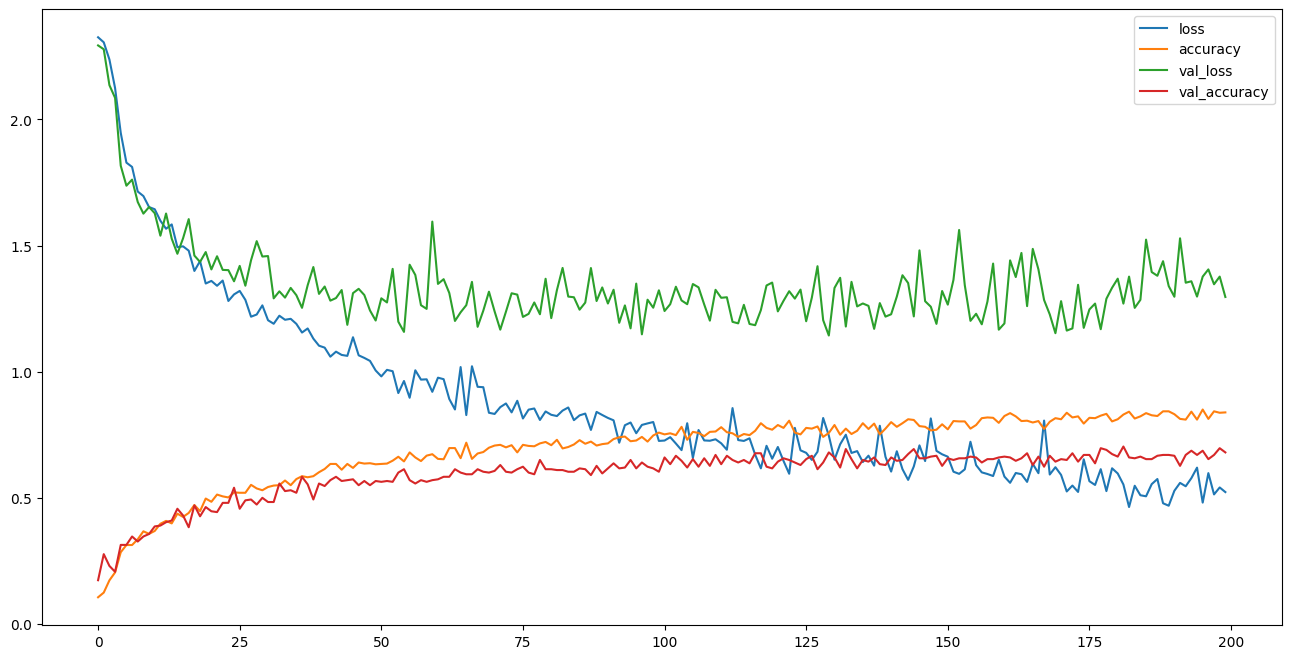

In [ ]:
pd.DataFrame(history.history).plot(figsize=(16,8))
plt.show()

# If we convert our 2D input into 1D : using Flatten


In [ ]:
# using Flatten

model = Sequential()

model.add(Flatten(input_shape=(58,)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 58)                0         
                                                                 
 dense_14 (Dense)            (None, 256)               15104     
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
adam = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 200, batch_size = 10)


In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[1.7093863487243652, 0.6933333277702332]